In [1]:
#Importing libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#importing stock history

Tesla = web.DataReader('TSLA',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31') #Extract data from yahoo finance website
SP500 = web.DataReader('^GSPC',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31')

#Check both lengths are same. If you pull data from different stock echanges, the length might be different depending on holidays
print(len(Tesla['Open']))
print(len(SP500['Open'])) 
#Getany other  ticker by searching here https://finance.yahoo.com/quote/

1006
1006


In [3]:
Tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000
...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005


In [4]:
SP500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029
...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020


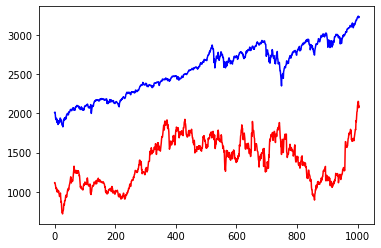

In [5]:
L = len(Tesla['Open'])
All_Data = np.concatenate((np.array(Tesla['Open']).reshape(L,1), np.array(Tesla['Close']).reshape(L,1), 
                           np.array(Tesla['High']).reshape(L,1), np.array(Tesla['Low']).reshape(L,1), 
                           np.array(SP500['Open']).reshape(L,1), np.array(SP500['Close']).reshape(L,1),
                          np.array(SP500['High']).reshape(L,1), np.array(SP500['Low']).reshape(L,1)), axis = 1)
plt.plot(np.array(Tesla['Close'])*5, 'r')  #Displayed at 5 times the scale for better visualization
plt.plot(np.array(SP500['Close']), 'b')

In [6]:
All_Data

array([[ 230.72000122,  223.41000366,  231.38000488, ..., 2012.66003418,
        2038.19995117, 1989.68005371],
       [ 226.36000061,  223.42999268,  226.88999939, ..., 2016.70996094,
        2021.93994141, 2004.17004395],
       [ 220.        ,  219.03999329,  220.05000305, ..., 1990.26000977,
        2011.70996094, 1979.05004883],
       ...,
       [ 435.        ,  430.38000488,  435.30999756, ..., 3240.02001953,
        3247.92993164, 3234.37011719],
       [ 428.79000854,  414.70001221,  429.        , ..., 3221.29003906,
        3240.91992188, 3216.57006836],
       [ 405.        ,  418.32998657,  421.29000854, ..., 3230.7800293 ,
        3231.7199707 , 3212.0300293 ]])

In [0]:
#creating train and test sets
train=All_Data[0:round(len(All_Data)*0.8),:]
valid=All_Data[round(len(All_Data)*0.8):,:]

In [0]:
#connverting dataset into x_train and y_train
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(All_Data)

x_train, y_train = [], []
for i in range(50,len(train)):
    x_train.append(scaled_data[i-50:i,:])
    y_train.append(scaled_data[i,1])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],8))

In [9]:
x_train.shape

(755, 50, 8)

In [10]:
y_train.shape

(755,)

In [11]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1:])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            11800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,051
Trainable params: 32,051
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
755/755 [==============================] - 2s 3ms/step - loss: 0.0241
Epoch 2/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 3/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 4/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 5/500
755/755 [==============================] - 2s 2ms/step - loss: 0.0035
Epoch 6/500
755/755 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 7/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 8/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 9/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 10/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 11/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 12/500
755/755 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 13/500


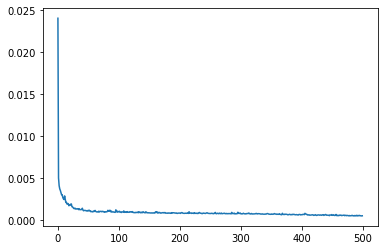

In [13]:
plt.plot(history.history['loss'])

In [0]:
#predicting future values, using past 50 values from the train data
inputs = All_Data[len(All_Data)-len(valid)- 50:]
inputs  = scaler.transform(inputs)

X_test = []
for i in range(50,inputs.shape[0]):
    X_test.append(inputs[i-50:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],8))
closing_price = model.predict(X_test)

#closing_price = scaler.inverse_transform(closing_price)

# creating temp variable to avoid invese transform error.
temp = np.zeros(shape=(len(closing_price), 8) )
temp[:,0] = closing_price[:,0]
closing_price = scaler.inverse_transform(temp)[:,0]

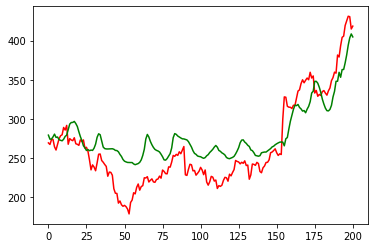

In [15]:
#for plotting

plt.plot(valid[:,1],'r')
plt.plot(closing_price,'g')